# Defense Logistics Dataset – Feature Selection & Engineering (Day 2)

### Takeaways from this notrbook:
1. Introduce feature selection in the context of defense logistics prediction.
2. Explore correlation-based feature selection using visual tools.
3. Demonstrate domain-inspired feature engineering (ratios, interactions).
4. Apply normalization, standardization, and handle preprocessing.
5. Implement iterative variable selection (forward stepwise approach).
6. Use extensive plots and comparative analysis for clarity.

We will use `Logistics_Performance` as the target variable.


In [1]:
import pandas as pd
df = pd.read_csv("defense_logistics_dataset.csv")
df.head()

,Supply_Chain_Lead_Time,Equipment_Availability,Personnel_Readiness,Transport_Efficiency,Inventory_Buffer,Maintenance_Downtime,Communication_Reliability,Operational_Tempo,Fuel_Variability,Weather_Disruption,Terrain_Transport_Interaction,Adversary_Interference,Logistics_Performance
0,12.483571,0.792618,0.939936,0.563754,19.026142,12.209084,0.804610,0.738270,0.085780,3.180641,0.051325,0.984089,6210.571994
1,9.308678,0.890942,0.892463,0.465527,22.358310,12.878423,0.856981,0.431088,0.300000,1.372687,0.015670,0.292249,5868.484176
2,13.238443,0.560143,0.805963,0.491474,15.128679,9.240638,0.879320,0.801672,0.195599,2.045223,0.003970,0.294817,4914.001181
3,17.615149,0.756297,0.735306,0.575983,19.766589,8.142470,0.994384,0.999430,0.031693,2.051198,0.129107,0.354548,5798.166096
4,8.829233,0.634936,0.869822,0.479783,12.396385,7.814573,0.927828,0.383990,0.042334,1.498216,0.111786,0.564594,4910.579969


### Exploratory Data Analysis

This code will perform three main tasks:

1. **Descriptive Statistics**

   - Generates summary statistics (`count, mean, std, min, max, quartiles`) for all features.  
   - The table is transposed with `.T` operator so that features appear as rows for better readability.  

2. **Histograms of All Features**

   - Plots histograms for every feature in the dataset.  
   - Uses:
     - 20 bins  
     - Steelblue color with black edges  
     - Figure size of 16 × 12  
   - A common title *“Feature Distributions”* is added above all subplots.  

3. **Pairplot of Selected Features**

   - Creates a pairplot for:  
     *Supply_Chain_Lead_Time, Equipment_Availability, Maintenance_Downtime, Logistics_Performance*.  
   - Diagonal plots are histograms (`diag_kind="hist"`).  
   - Off-diagonal plots are scatterplots with semi-transparent points (`alpha=0.6`).  
   - A dashed grid (`--`) adds clarity.  

---

**Summary**:  
The workflow first presents numerical summaries, then shows feature distributions with histograms, and finally explores pairwise feature relationships. 


                               count         mean         std          min  \
Supply_Chain_Lead_Time         500.0    10.080363    4.802394     1.000000   
Equipment_Availability         500.0     0.703183    0.097800     0.430311   
Personnel_Readiness            500.0     0.809821    0.098868     0.510374   
Transport_Efficiency           500.0     0.502001    0.071678     0.237885   
Inventory_Buffer               500.0    20.007432    3.699533     8.286819   
Maintenance_Downtime           500.0    10.120734    2.499365     3.173092   
Communication_Reliability      500.0     0.898837    0.051401     0.753528   
Operational_Tempo              500.0     0.494370    0.326914     0.000101   
Fuel_Variability               500.0     0.083799    0.095980     0.000001   
Weather_Disruption             500.0     1.986123    1.006206     0.000000   
Terrain_Transport_Interaction  500.0     0.086144    0.102388     0.000006   
Adversary_Interference         500.0     0.495694    0.295159   

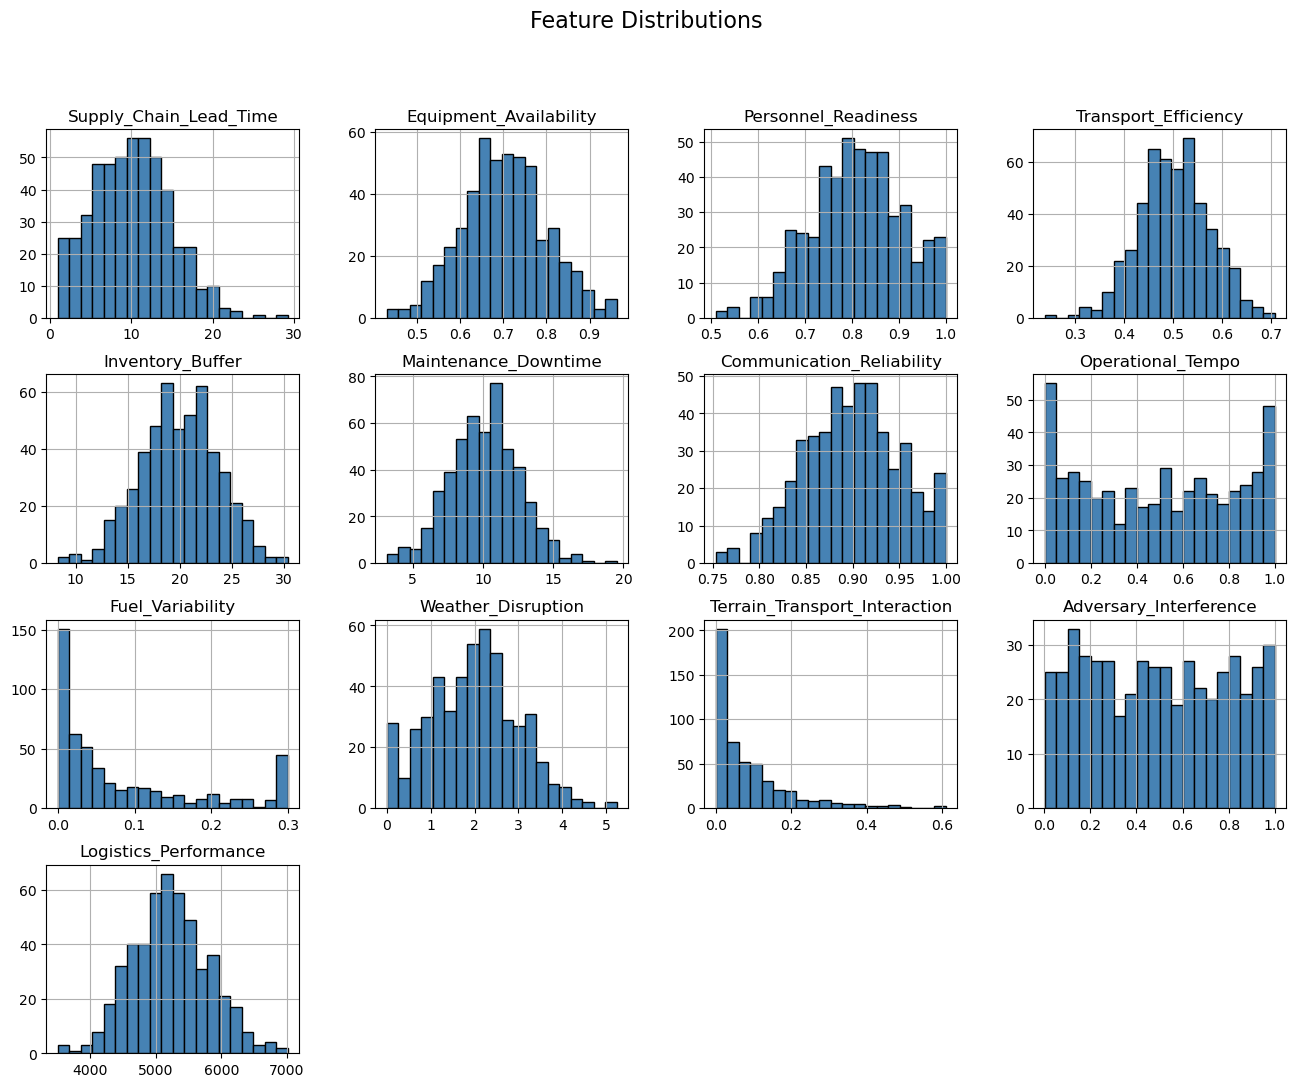

/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

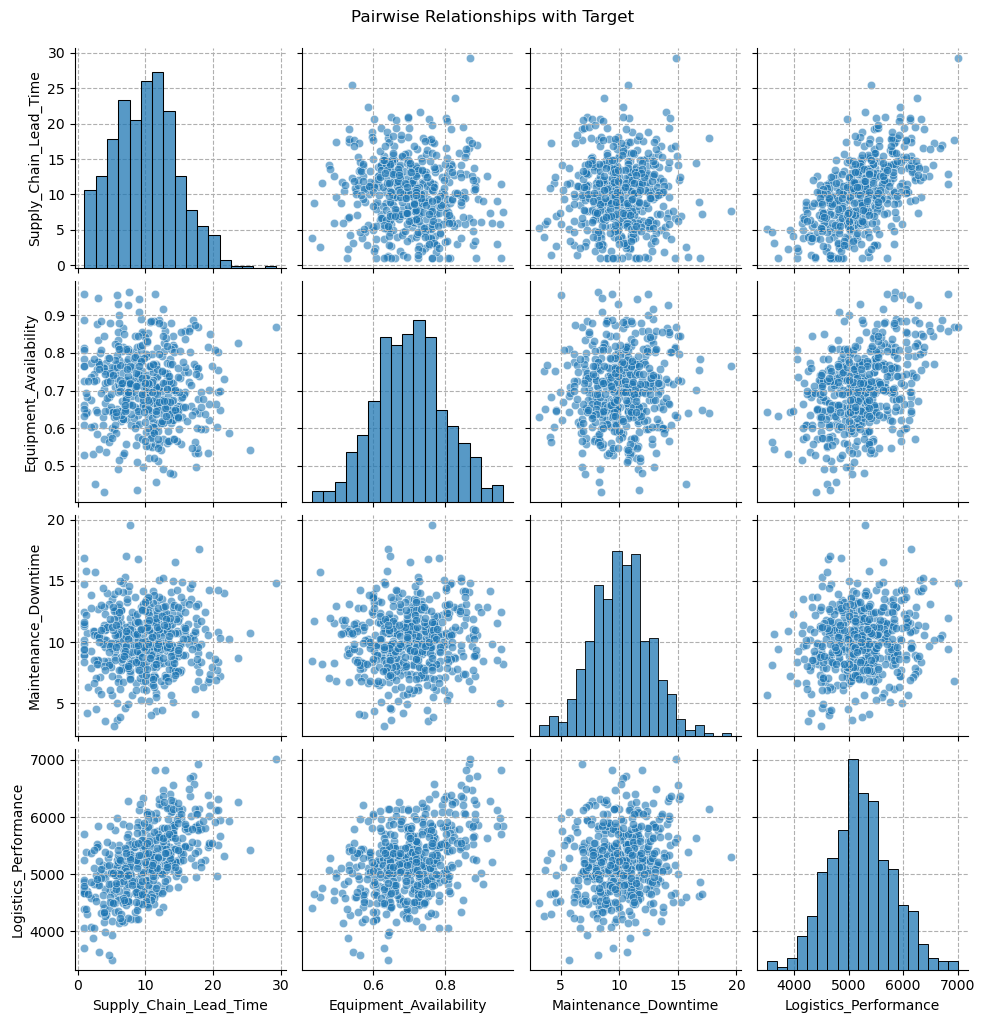

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic statistics
print(df.describe().T)

# Histograms for all features
df.hist(figsize=(16,12), bins=20, color="steelblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Pairplot of first few features vs target
g = sns.pairplot(df[["Supply_Chain_Lead_Time","Equipment_Availability",
                 "Maintenance_Downtime","Logistics_Performance"]],
                 diag_kind="hist", plot_kws={"alpha":0.6})
# Apply ":" grid to every subplot
for ax in g.axes.flatten():
    if ax is not None:  # skip empty positions
        ax.grid(True, linestyle="--")
plt.suptitle("Pairwise Relationships with Target", y=1.02)
plt.show()


### Correlation Analysis

This code performs correlation analysis and visualization in three steps:

---

#### 1. Correlation Matrix and Heatmap
- We compute the full **correlation matrix** for all features in the dataframe.  
- We then visualize it as a **heatmap** using Seaborn with:
  - `annot=True` → displays correlation values inside each cell.  
  - `cmap="coolwarm"` → red/blue colors for positive/negative correlations.  
  - `center=0` → ensures that zero correlation is visually centered.  

---

#### 2. Sorting Correlations with Target
- Extracts the correlation values of all features with the target variable **`Logistics_Performance`**.  
- Sorts these correlations in descending order to highlight the strongest positive and negative relationships.  
- Prints the sorted correlations to the console for quick inspection.  

---

#### 3. Bar Plot of Feature Correlations
- Drops the target’s self-correlation (always 1.0).  
- Plots a **horizontal bar chart** of feature correlations with the target.  
- Uses:
  - Dark green color for the bars.  
  - X-axis labeled as *Correlation coefficient*.  
  - Title *“Feature Correlation with Target”*.  
- This makes it easy to compare which features are most influential (positively or negatively) on the target variable.  

---

**Summary**:  
The workflow first visualizes the overall correlation structure, then focuses on the target variable by ranking feature correlations, and finally presents these relationships in a clear bar plot.  


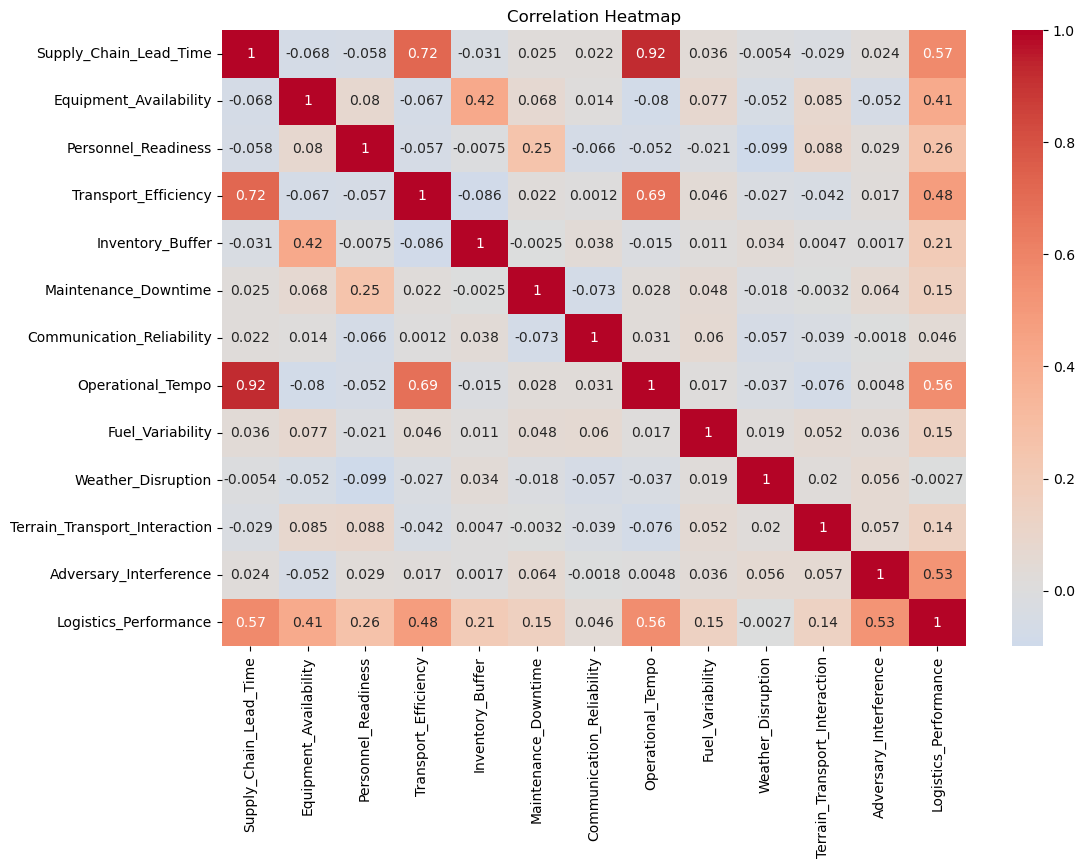

Top correlations with Logistics_Performance:
Logistics_Performance            1.000000
Supply_Chain_Lead_Time           0.573031
Operational_Tempo                0.559014
Adversary_Interference           0.525270
Transport_Efficiency             0.476585
Equipment_Availability           0.413211
Personnel_Readiness              0.259634
Inventory_Buffer                 0.205670
Maintenance_Downtime             0.153058
Fuel_Variability                 0.149490
Terrain_Transport_Interaction    0.139247
Communication_Reliability        0.046460
Weather_Disruption              -0.002683
Name: Logistics_Performance, dtype: float64


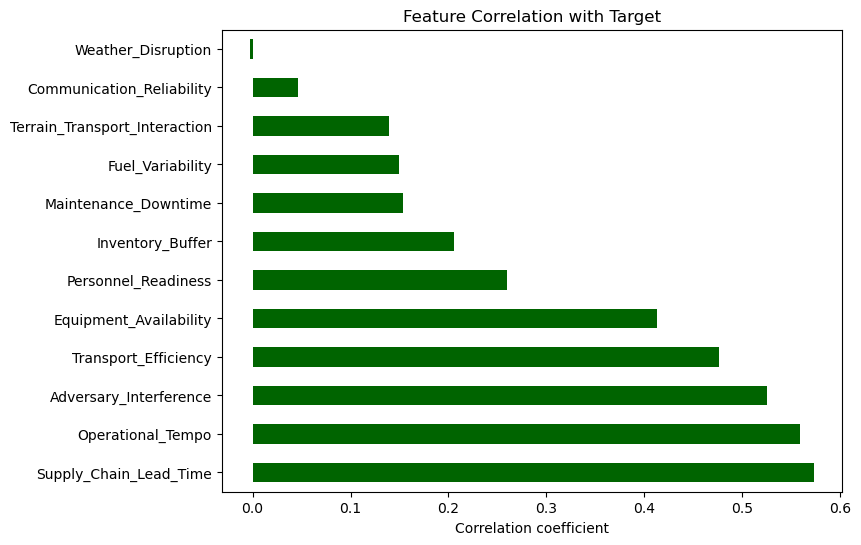

In [3]:
# Correlation matrix
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Sort correlations with target
target_corr = corr["Logistics_Performance"].sort_values(ascending=False)
print("Top correlations with Logistics_Performance:")
print(target_corr)

# Bar plot of correlations
target_corr.drop("Logistics_Performance").plot(kind="barh", figsize=(8,6), color="darkgreen")
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation coefficient")
plt.show()


### Engineered Feature Creation and Analysis

This cell creates __`new engineered features`__, visualizes their distributions, and compares them against the target variable:

---

#### 1. __Feature Engineering__
- **Supply_Inventory_Ratio**  
  Computed as `Supply_Chain_Lead_Time / (Inventory_Buffer + 1)`.  
  Captures the relationship between supply delays and available inventory buffers.  

- **Readiness_Tempo**  
  Computed as `Personnel_Readiness * Operational_Tempo`.  
  Represents how personnel readiness scales with the operational activity tempo.  

- **Maintenance_Impact**  
  Computed as `Maintenance_Downtime / (Equipment_Availability + 1e-3)`.  
  Measures the relative effect of downtime on available equipment.  
  A small constant (`1e-3`) is added to avoid division by zero.  

---

#### 2. Distribution Visualization
- Histograms of the three engineered features are plotted with 20 bins.  
- Figure is shown below.  
- The title *“Engineered Feature Distributions”* is added to show how these new variables are spread across the dataset.  

---

#### 3. Comparison with Target
- A **pairplot** is generated for the engineered features alongside the target variable `Logistics_Performance`.  
- Diagonal plots use KDE (kernel density estimation) to show smoothed distributions.  
- Off-diagonal plots display scatterplots, making it easy to identify relationships between engineered features and the target.  
- A main title *“Engineered Features vs Target”* is added above the pairplot.  

---

**Summary**:  
The cell introduces three meaningful engineered features, examines their distributions, and explores their relationships with the target variable to assess their potential predictive value.  


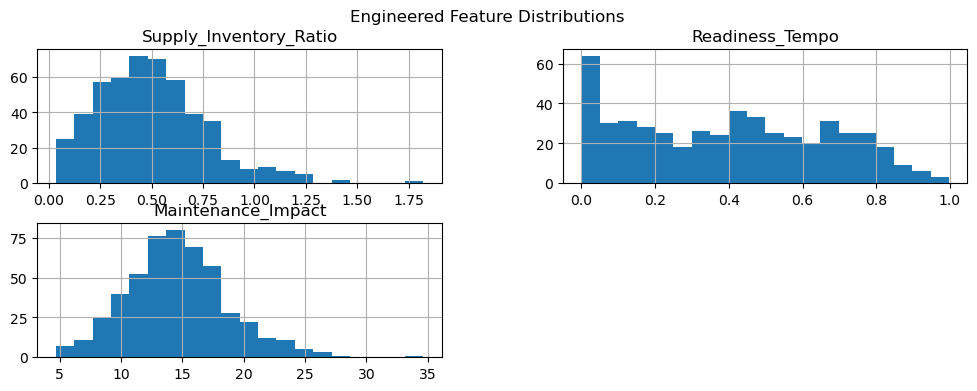

/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

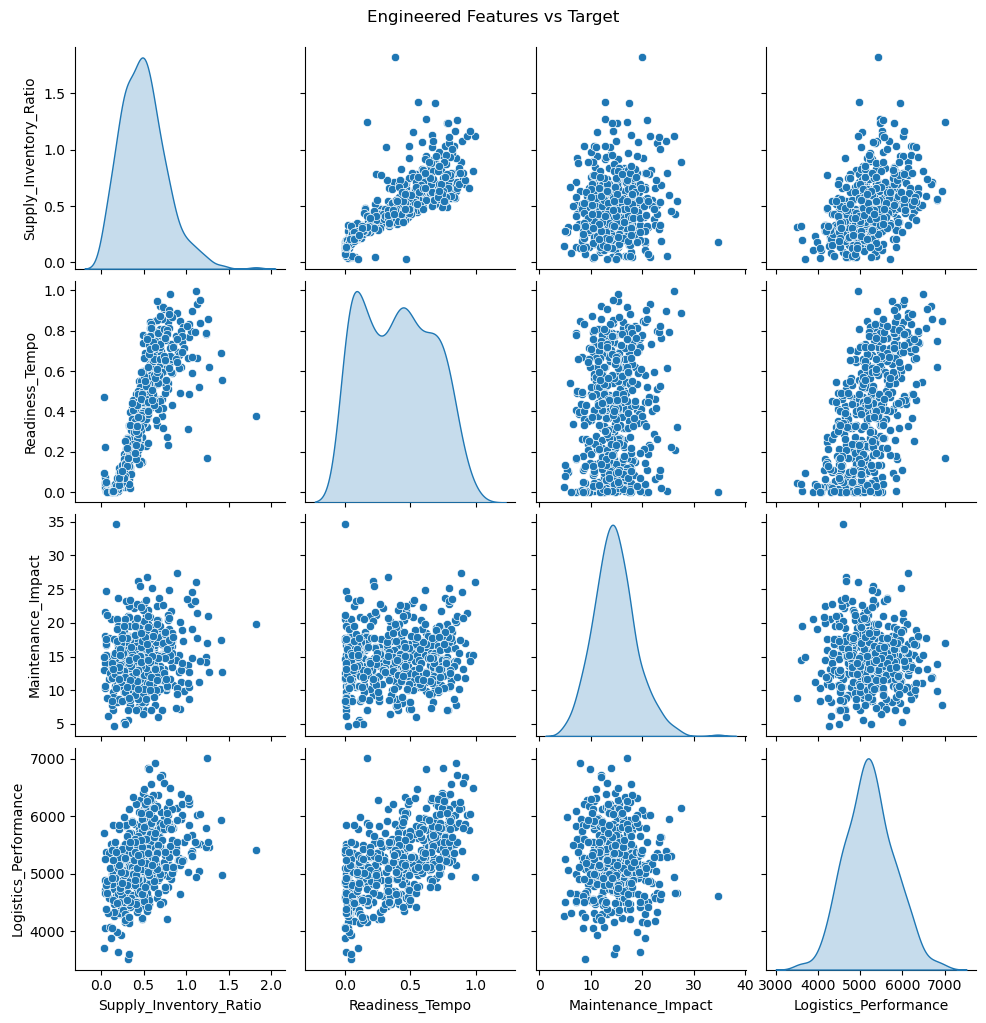

In [4]:
# Example engineered features
df["Supply_Inventory_Ratio"] = df["Supply_Chain_Lead_Time"] / (df["Inventory_Buffer"]+1)
df["Readiness_Tempo"] = df["Personnel_Readiness"] * df["Operational_Tempo"]
df["Maintenance_Impact"] = df["Maintenance_Downtime"] / (df["Equipment_Availability"]+1e-3)

# Visualize distributions
df[["Supply_Inventory_Ratio","Readiness_Tempo","Maintenance_Impact"]].hist(bins=20, figsize=(12,4))
plt.suptitle("Engineered Feature Distributions")
plt.show()

# Compare engineered features vs target
sns.pairplot(df[["Supply_Inventory_Ratio","Readiness_Tempo",
                 "Maintenance_Impact","Logistics_Performance"]],
             diag_kind="kde")
plt.suptitle("Engineered Features vs Target", y=1.02)
plt.show()


### Feature Scaling and Comparison

This cell demonstrates how to preprocess features using **standardization** and **normalization**, and then visually compares their effects on the data.

---

#### 1. Splitting Features and Target
- **Features**: All columns except `Logistics_Performance`.  
- **Target**: The column `Logistics_Performance`, which we aim to predict.  
- This separation ensures that only input variables are scaled, while the target remains unchanged.  

---

#### 2. Scaling Methods
- **Standardization**  
  - Uses `StandardScaler()` to transform features such that each has:  
    - Mean = 0  
    - Standard deviation = 1  
  - Useful when features follow Gaussian-like distributions or when algorithms assume standardized inputs (e.g., regression, PCA, neural networks).  

- **Normalization (Min-Max Scaling)**  
  - Uses `MinMaxScaler()` to rescale features into the range **[0, 1]**.  
  - Preserves relative distances but compresses values to a fixed interval.  
  - Useful for distance-based models (e.g., kNN, clustering) or algorithms sensitive to feature magnitude.  

---

#### 3. Visual Comparison
- A figure with 3 subplots compares the feature **Supply_Chain_Lead_Time** under different treatments:  
  1. **Original Distribution** (blue): Raw feature values.  
  2. **Standardized** (red): Distribution shifted to mean 0 with unit variance.  
  3. **Normalized (0–1)** (green): All values rescaled between 0 and 1.  

- Histograms are plotted with overlaid KDE curves to show both discrete frequency and smoothed density.  
- A shared title *“Comparison of Scaling Methods”* summarizes the results.  

---

**Summary**:  
This workflow illustrates the effect of preprocessing on feature distributions:  
- **Original** → raw scale, may have skewed ranges.  
- **Standardized** → centered and unit-scaled, good for models assuming normality.  
- **Normalized** → bounded between 0 and 1, useful for magnitude-sensitive models.  


/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anil/anaconda3/envs/soft-computing/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


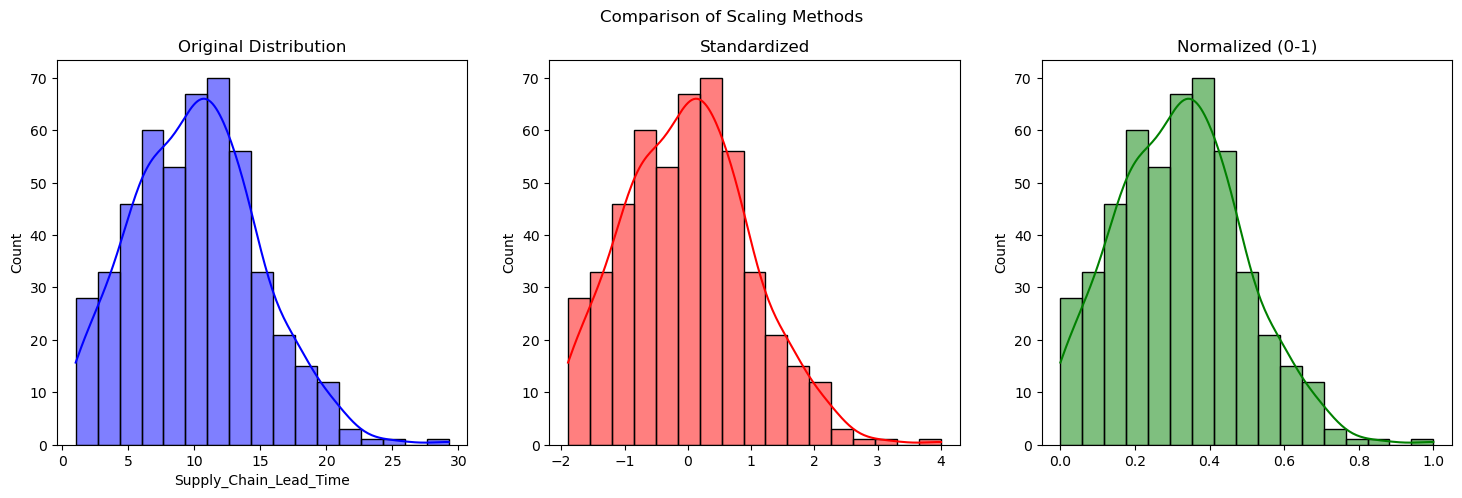

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features = df.drop(columns=["Logistics_Performance"])
target = df["Logistics_Performance"]

# Standardization
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(features)

# Normalization (0-1)
scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(features)

# Visual comparison
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.histplot(features["Supply_Chain_Lead_Time"], ax=axes[0], kde=True, color="blue")
axes[0].set_title("Original Distribution")
sns.histplot(X_std[:,0], ax=axes[1], kde=True, color="red")
axes[1].set_title("Standardized")
sns.histplot(X_norm[:,0], ax=axes[2], kde=True, color="green")
axes[2].set_title("Normalized (0-1)")
plt.suptitle("Comparison of Scaling Methods")
plt.show()


### Forward Stepwise Feature Selection (with Cross-Validation)

In this cell, now we perform **forward stepwise feature selection** using linear regression and evaluate model performance at each step with cross-validated $R^2$ scores.

---

#### 1. Setup
- **Features (`X`)**: All independent variables.  
- **Target (`y`)**: The variable `Logistics_Performance`.  
- Initializes two lists:
  - `remaining_features`: features yet to be selected.  
  - `selected_features`: features chosen in the current iteration.  
  - `best_scores`: stores best $R^2$ scores at each step.  

---

#### 2. Iterative Feature Selection
- While there are still remaining features:  
  - For each candidate feature not yet selected, a **LinearRegression** model is trained using `selected_features + candidate`.  
  - Performance is measured using **5-fold cross-validation** with $R^2$ as the scoring metric.  
  - The candidate with the highest mean $R^2$ score is chosen.  
- That feature is added to `selected_features`, removed from `remaining_features`, and its score is saved.  
- This process continues until all features are ranked.  

---

#### 3. Visualization
- Plots the evolution of cross-validated $R^2$ scores as features are added:  
  - X-axis → order of selected features.  
  - Y-axis → $R^2$ score.  
  - Dashed line with circular markers shows incremental improvement.  
- A grid and rotated feature labels improve readability.  
- We put the title: *“Forward Stepwise Feature Selection ($R^2$)”*.  

---

#### 4. Output
- Prints the **final order of feature selection**, i.e., the ranking of features by their incremental contribution to model performance.  

---

**Summary**:  
This workflow applies forward stepwise selection to identify the sequence in which features most improve predictive performance, visualizes the improvement in $R^2$ with each added feature, and provides a ranked feature list for model interpretation.  


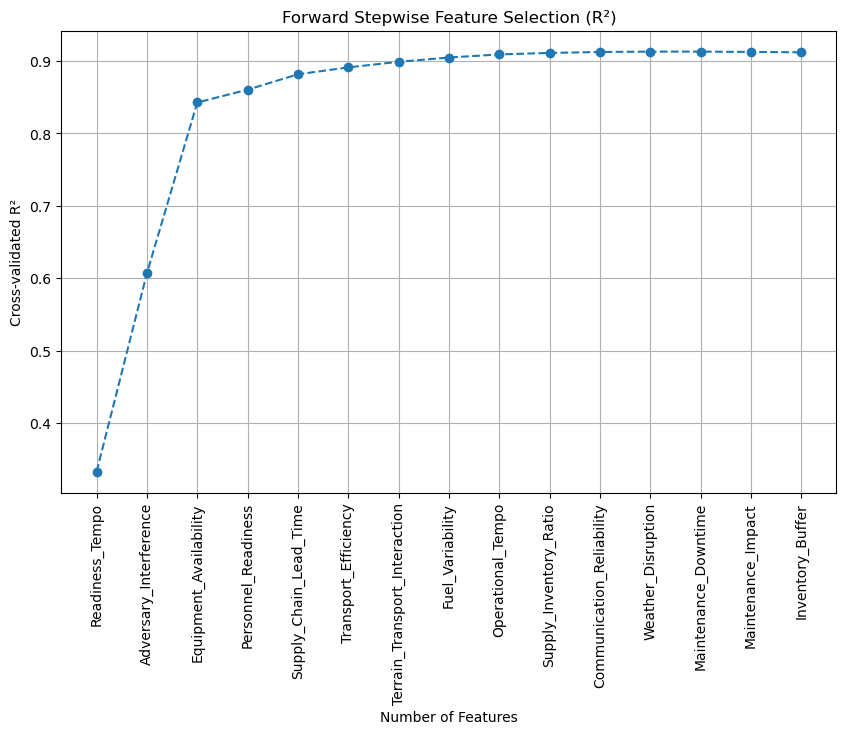

Final order of feature selection: ['Readiness_Tempo', 'Adversary_Interference', 'Equipment_Availability', 'Personnel_Readiness', 'Supply_Chain_Lead_Time', 'Transport_Efficiency', 'Terrain_Transport_Interaction', 'Fuel_Variability', 'Operational_Tempo', 'Supply_Inventory_Ratio', 'Communication_Reliability', 'Weather_Disruption', 'Maintenance_Downtime', 'Maintenance_Impact', 'Inventory_Buffer']


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = features
y = target

remaining_features = list(X.columns)
selected_features = []
best_scores = []

while remaining_features:
    scores_with_candidates = []
    for candidate in remaining_features:
        model = LinearRegression()
        feats = selected_features + [candidate]
        score = cross_val_score(model, X[feats], y, cv=5, scoring="r2").mean()
        scores_with_candidates.append((score, candidate))
    
    scores_with_candidates.sort(reverse=True)
    best_score, best_candidate = scores_with_candidates[0]
    selected_features.append(best_candidate)
    remaining_features.remove(best_candidate)
    best_scores.append(best_score)

# Plot stepwise selection
plt.figure(figsize=(10,6))
plt.plot(range(1,len(best_scores)+1), best_scores, marker="o", linestyle="--")
plt.xticks(range(1,len(best_scores)+1), selected_features, rotation=90)
plt.title("Forward Stepwise Feature Selection (R²)")
plt.xlabel("Number of Features")
plt.ylabel("Cross-validated R²")
plt.grid(True)
plt.show()

print("Final order of feature selection:", selected_features)


# Comparative Analysis & Conclusions

- **Correlation Analysis** showed which features are most aligned with *Logistics_Performance*.
- **Feature Engineering** produced interpretable metrics such as *Supply_Inventory_Ratio* and *Maintenance_Impact* that improved interpretability.
- **Scaling** demonstrated how normalization and standardization reshape distributions for model compatibility.
- **Iterative Stepwise Selection** identified an optimal set of features by maximizing R² through cross-validation.

This notebook provides a complete walkthrough of feature selection, engineering, and preprocessing for defense logistics prediction.

---

## __Model Selection (Extra)__

### Linear Regression Model Evaluation Metrics

This cell defines functions to fit a multiple linear regression model and compute five key evaluation metrics: **RSS, R², Adjusted R², AIC, and BIC**.

**Summary**:  
This cell equips you with functions to evaluate regression models beyond just R², enabling robust **model comparison and selection**.  
- **RSS & R²** → measure model fit.  
- **Adjusted R²** → adjusts for number of predictors.  
- **AIC & BIC** → penalize overly complex models.  


In [7]:
# Function for linear regression (RSS, R²)
def multiple_linear_regression(X, Y):
    LR_model = linear_model.LinearRegression(fit_intercept=True)
    LR_model.fit(X, Y)
    RSS = mean_squared_error(Y, LR_model.predict(X)) * len(Y)
    R_sq = LR_model.score(X, Y)
    return RSS, R_sq

# Functions for adjusted R², AIC, BIC
def adj_r2(r2, n, k):
    return 1 - (1-r2)*(n-1)/(n-k-1)

def aic(rss, n, k):
    return n*np.log(rss/n) + 2*k

def bic(rss, n, k):
    return n*np.log(rss/n) + k*np.log(n)

### Exhaustive Feature Subset Evaluation

This cell evaluates **all possible combinations of features** for predicting `Logistics_Performance` using multiple linear regression, and computes key model performance metrics for each subset.

---

#### 1. Data Setup
- **Target (`Y`)**: `Logistics_Performance`.  
- **Features (`X`)**: All remaining columns in the dataset.  
- `n` = number of observations, `p` = number of features.  

---

#### 2. Exhaustive Search over Feature Subsets
- Loops over feature subsets of size **k = 1 to p**.  
- Uses `itertools.combinations` to generate every possible feature combination.  
- For each subset:
  - Fits a multiple linear regression model.  
  - Computes performance metrics using helper functions.  

---

#### 3. Computed Metrics
For each subset, the following metrics are stored:
- **RSS (Residual Sum of Squares)** → error measure.  
- **R² (Coefficient of Determination)** → proportion of variance explained.  
- **Adjusted R²** → penalized R² that accounts for number of predictors.  
- **AIC (Akaike Information Criterion)** → model quality, lower is better.  
- **BIC (Bayesian Information Criterion)** → similar to AIC, stronger penalty for complexity.  

---

#### 4. Results Storage
- Results for all subsets are stored in a list of dictionaries.  
- Converted into a **DataFrame (`results_df`)** with columns:
  - `num_features` → number of features in the subset.  
  - `features` → feature names in the subset.  
  - `RSS`, `R2`, `AdjR2`, `AIC`, `BIC` → computed metrics.  
- `results_df.head()` shows the first few rows of this exhaustive evaluation.  

---

**Summary**:  
This workflow performs an **all-subset regression search**, calculating key performance metrics for every possible feature combination. The resulting DataFrame allows comparison of models based on fit (RSS, R²), parsimony (Adjusted R²), and information criteria (AIC, BIC), supporting data-driven **model selection**.  


In [8]:
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Y = df["Logistics_Performance"]
X = df.drop(columns="Logistics_Performance")
n, p = X.shape

results = []
for k in range(1, p+1):
    for combo in itertools.combinations(X.columns, k):
        X_combo = X[list(combo)]
        rss, r2 = multiple_linear_regression(X_combo, Y)
        results.append({
            "num_features": k,
            "features": combo,
            "RSS": rss,
            "R2": r2,
            "AdjR2": adj_r2(r2, n, k),
            "AIC": aic(rss, n, k),
            "BIC": bic(rss, n, k)
        })

results_df = pd.DataFrame(results)
results_df.head()


,num_features,features,RSS,R2,AdjR2,AIC,BIC
0,1,"(Supply_Chain_Lead_Time,)",1.141894e+08,0.328364,0.327016,6171.380376,6175.594985
1,1,"(Equipment_Availability,)",1.409876e+08,0.170744,0.169079,6276.787133,6281.001741
2,1,"(Personnel_Readiness,)",1.585561e+08,0.067410,0.065537,6335.505520,6339.720128
3,1,"(Transport_Efficiency,)",1.314003e+08,0.227134,0.225582,6241.575544,6245.790152
4,1,"(Inventory_Buffer,)",1.628251e+08,0.042300,0.040377,6348.789610,6353.004218


## Formulae of Model Evaluation Metrics

When evaluating regression models, several statistical metrics are commonly used to assess model fit, complexity, and predictive quality. Below are definitions, formulas, and interpretations.

---

### 1. Coefficient of Determination ($R^2$)
**Definition:** Measures the proportion of variance in the dependent variable explained by the independent variables.

**Formula:**
$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

where  
- **Residual Sum of Squares (RSS):**
  $$
  \text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

- **Total Sum of Squares (TSS):**
  $$
  \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2
  $$

**Interpretation:** Higher $R^2$ indicates better explanatory power. However, it always increases (or stays constant) when adding more predictors, even if they are irrelevant.

---

### 2. Adjusted $R^2$
**Definition:** A version of $R^2$ that penalizes for adding predictors that do not improve the model sufficiently.

**Formula:**
$$
R^2_{adj} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

where  

- Number of observations: n
- Number of predictors: p

**Interpretation:** Increases only if the new predictor improves the model more than would be expected by chance. Preferred for comparing models with different numbers of predictors.

---

### 3. Residual Sum of Squares (RSS)
**Definition:** The sum of squared differences between observed and predicted values.

**Formula:**
$$
\text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

**Interpretation:** Smaller RSS indicates better fit, but it decreases monotonically as more predictors are added, hence not sufficient alone to judge model quality.

---

### 4. Akaike Information Criterion (AIC)
**Definition:** A metric balancing model fit and complexity; lower values are preferred.

**Formula:**
$$
\text{AIC} = n \cdot \ln\!\left(\frac{\text{RSS}}{n}\right) + 2p
$$

where, p includes the intercept.

**Interpretation:** Penalizes models with more parameters. Helps select a model that fits well without overfitting.

---

### 5. Bayesian Information Criterion (BIC)
**Definition:** Similar to AIC but imposes a stronger penalty for model complexity, especially as sample size grows.

**Formula:**
$$
\text{BIC} = n \cdot \ln\!\left(\frac{\text{RSS}}{n}\right) + p \cdot \ln(n)
$$

**Interpretation:** Stricter than AIC in penalizing additional predictors. Lower BIC indicates a better trade-off between fit and simplicity.

---

## Summary of Model Quality Reflections
- **R²**: Goodness of fit, but can overstate model quality with many predictors.  
- **Adjusted R²**: Adjusted for number of predictors; better for model comparison.  
- **RSS**: Measures error magnitude; smaller is better, but not reliable alone.  
- **AIC**: Balances fit and complexity; favors parsimonious models.  
- **BIC**: Like AIC but harsher penalty for extra parameters; useful for large n.  

---


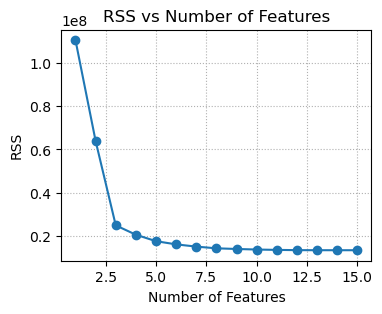

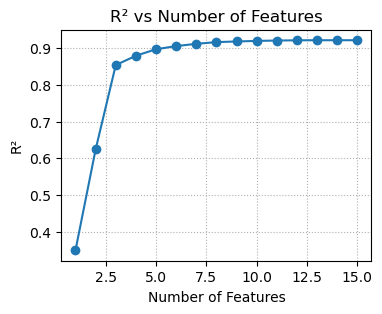

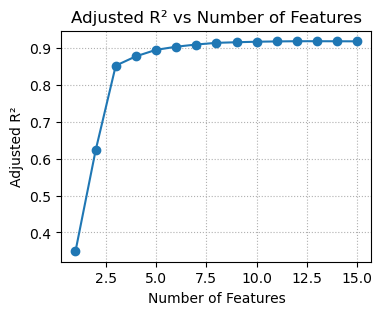

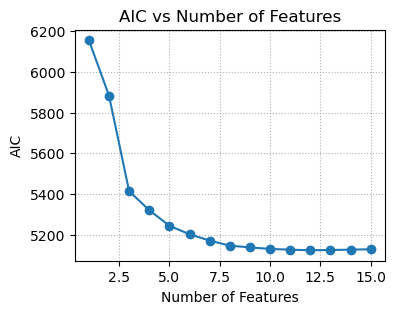

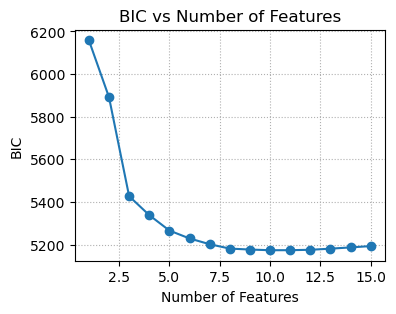

In [9]:

plt.figure(figsize=(4,3))
plt.plot(results_df.groupby("num_features")["RSS"].min(), marker="o")
plt.xlabel("Number of Features"); plt.ylabel("RSS")
plt.title("RSS vs Number of Features")
plt.grid(ls=":")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(results_df.groupby("num_features")["R2"].max(), marker="o")
plt.xlabel("Number of Features"); plt.ylabel("R²")
plt.title("R² vs Number of Features")
plt.grid(ls=":")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(results_df.groupby("num_features")["AdjR2"].max(), marker="o")
plt.xlabel("Number of Features"); plt.ylabel("Adjusted R²")
plt.title("Adjusted R² vs Number of Features")
plt.grid(ls=":")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(results_df.groupby("num_features")["AIC"].min(), marker="o")
plt.xlabel("Number of Features"); plt.ylabel("AIC")
plt.title("AIC vs Number of Features")
plt.grid(ls=":")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(results_df.groupby("num_features")["BIC"].min(), marker="o")
plt.xlabel("Number of Features"); plt.ylabel("BIC")
plt.title("BIC vs Number of Features")
plt.grid(ls=":")
plt.show()


### Forward Stepwise Regression (Model Selection)

This cell implements a **forward stepwise regression procedure** to select features for predicting `Logistics_Performance`, while tracking multiple evaluation metrics at each step.

---

#### 1. Initialization
- **remaining** → list of all features not yet selected.  
- **selected** → list of currently chosen features (initially empty).  
- **stepwise_results** → stores results for each selection step.  

---

#### 2. Iterative Feature Selection
- While there are features left:
  - For each candidate feature in `remaining`, fit a regression model with `selected + candidate`.  
  - Compute **RSS** and **$R^2$** for that model.  
  - Select the feature that produces the **lowest RSS** (best fit).  
  - Add that feature to `selected` and remove it from `remaining`.  

---

#### 3. Metrics Recorded at Each Step
After each feature is added, the model is refit with all currently selected features, and the following are stored:
- **num_features** → number of features included so far.  
- **features** → tuple of selected feature names.  
- **RSS (Residual Sum of Squares)** → model error.  
- **$R^2$ (Coefficient of Determination)** → proportion of explained variance.  
- **Adjusted $R^2$** → $R^2$ corrected for number of predictors.  
- **AIC** → Akaike Information Criterion, lower = better balance of fit and simplicity.  
- **BIC** → Bayesian Information Criterion, lower = better under Bayesian model selection.  

---

#### 4. Results
- All results are compiled into a DataFrame `stepwise_df`.  
- Each row corresponds to one step in the forward selection process, showing which feature was added and how the metrics changed.  

---

**Summary**:  
This cell performs **forward stepwise feature selection**, progressively adding features that most reduce RSS, while keeping track of goodness-of-fit and information criteria. The resulting DataFrame (`stepwise_df`) provides a clear record of model evolution and helps identify the optimal feature subset.  


In [10]:

remaining = list(X.columns)
selected = []
stepwise_results = []

while remaining:
    scores = []
    for candidate in remaining:
        features = selected + [candidate]
        rss, r2 = multiple_linear_regression(X[features], Y)
        scores.append((rss, candidate, r2))
    scores.sort()
    best_new = scores[0][1]
    selected.append(best_new)
    remaining.remove(best_new)
    rss, r2 = multiple_linear_regression(X[selected], Y)
    stepwise_results.append({
        "num_features": len(selected),
        "features": tuple(selected),
        "RSS": rss,
        "R2": r2,
        "AdjR2": adj_r2(r2, n, len(selected)),
        "AIC": aic(rss, n, len(selected)),
        "BIC": bic(rss, n, len(selected))
    })

stepwise_df = pd.DataFrame(stepwise_results)
stepwise_df


,num_features,features,RSS,R2,AdjR2,AIC,BIC
0,1,"(Readiness_Tempo,)",1.104665e+08,0.350262,0.348957,6154.807319,6159.021927
1,2,"(Readiness_Tempo, Adversary_Interference)",6.390430e+07,0.624130,0.622617,5883.144566,5891.573783
2,3,"(Readiness_Tempo, Adversary_Interference, Equi...",2.492275e+07,0.853410,0.852524,5414.341676,5426.985500
3,4,"(Readiness_Tempo, Adversary_Interference, Equi...",2.214627e+07,0.869741,0.868688,5357.285687,5374.144120
4,5,"(Readiness_Tempo, Adversary_Interference, Equi...",1.859241e+07,0.890644,0.889537,5271.827964,5292.901004
5,6,"(Readiness_Tempo, Adversary_Interference, Equi...",1.703501e+07,0.899804,0.898585,5230.086539,5255.374187
6,7,"(Readiness_Tempo, Adversary_Interference, Equi...",1.584037e+07,0.906831,0.905505,5195.732121,5225.234378
7,8,"(Readiness_Tempo, Adversary_Interference, Equi...",1.490608e+07,0.912326,0.910897,5167.335720,5201.052585
8,9,"(Readiness_Tempo, Adversary_Interference, Equi...",1.420657e+07,0.916440,0.914905,5145.303489,5183.234962
9,10,"(Readiness_Tempo, Adversary_Interference, Equi...",1.389304e+07,0.918284,0.916613,5136.145151,5178.291232
